# Download and Extract Dataset

In [1]:
!wget -O dataset.zip https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/3xd9n945v8-1.zip

--2025-09-04 03:35:03--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/3xd9n945v8-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 52.218.109.88, 3.5.69.166, 3.5.67.133, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|52.218.109.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418384370 (399M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 399.00M  17.8MB/s    in 23s     

2025-09-04 03:35:26 (17.7 MB/s) - ‘dataset.zip’ saved [418384370/418384370]



In [2]:
import zipfile

with zipfile.ZipFile('/kaggle/working/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/')


# Import Dependencies

In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
import os

2025-09-04 03:35:34.406546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756956934.776857      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756956934.881368      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Import Preprocessed Dataset

In [4]:
data = pd.read_csv("/kaggle/input/dataset/avocado_ripening_data.csv")

In [5]:
data.head()

,File Name,Time Stamp,Sample,Day of Experiment,Ripening Index Classification,Overripening Day,Overripening Time Stamp,Time Unitl Overripening,Shelf-life Days,T10,T20,Tam
0,T20_d01_001_a_1,2022-04-04 18:56:55,1,1,1,9.0,2022-04-12 14:44:53,7 days 19:47:58,7.824977,0,1,0
1,T20_d01_001_b_1,2022-04-04 18:57:03,1,1,1,9.0,2022-04-12 14:44:53,7 days 19:47:50,7.824884,0,1,0
2,T20_d02_001_a_1,2022-04-05 14:16:21,1,2,1,9.0,2022-04-12 14:44:53,7 days 00:28:32,7.019815,0,1,0
3,T20_d02_001_b_1,2022-04-05 14:16:46,1,2,1,9.0,2022-04-12 14:44:53,7 days 00:28:07,7.019525,0,1,0
4,T20_d03_001_a_2,2022-04-06 15:08:50,1,3,2,9.0,2022-04-12 14:44:53,5 days 23:36:03,5.983368,0,1,0


### Define Paths of Images

In [6]:
image_folder_path = "/kaggle/working/Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset"
image_path = data["File Name"].apply(lambda x: os.path.join(image_folder_path, x + '.jpg'))

### Clean data with unexistant images

In [7]:
import pandas as pd
import os

# --- Assume 'data' is your DataFrame and 'image_folder_path' is defined ---

print(f"Original DataFrame size: {len(data)}")

image_folder_path = '/kaggle/working/Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset'

# --- Create the full path column ---
# This uses fast, vectorized pandas operations.
# It takes the 'File Name' and joins it with the base path and the .jpg extension.
data['filepath'] = data['File Name'].apply(
    lambda filename: os.path.join(image_folder_path, filename + '.jpg')
)
# --- 2. Create a Boolean Mask ---
# This creates a Series of True/False values.
# 'True' if the file exists, 'False' if it doesn't.
mask_exists = data['filepath'].apply(os.path.exists)

# --- 3. Apply the mask to filter the DataFrame ---
# This keeps only the rows where the mask value is True.
clean_data = data[mask_exists].copy() # .copy() prevents SettingWithCopyWarning later

# --- 4. (Optional) Report the dropped files ---
num_dropped = len(data) - len(clean_data)
if num_dropped > 0:
    print(f"Dropped {num_dropped} records due to missing image files.")

print(f"Clean DataFrame size: {len(clean_data)}")

Original DataFrame size: 13612
Dropped 8 records due to missing image files.
Clean DataFrame size: 13604


In [8]:
clean_data.head()

,File Name,Time Stamp,Sample,Day of Experiment,Ripening Index Classification,Overripening Day,Overripening Time Stamp,Time Unitl Overripening,Shelf-life Days,T10,T20,Tam,filepath
0,T20_d01_001_a_1,2022-04-04 18:56:55,1,1,1,9.0,2022-04-12 14:44:53,7 days 19:47:58,7.824977,0,1,0,/kaggle/working/Hass Avocado Ripening Photogra...
1,T20_d01_001_b_1,2022-04-04 18:57:03,1,1,1,9.0,2022-04-12 14:44:53,7 days 19:47:50,7.824884,0,1,0,/kaggle/working/Hass Avocado Ripening Photogra...
2,T20_d02_001_a_1,2022-04-05 14:16:21,1,2,1,9.0,2022-04-12 14:44:53,7 days 00:28:32,7.019815,0,1,0,/kaggle/working/Hass Avocado Ripening Photogra...
3,T20_d02_001_b_1,2022-04-05 14:16:46,1,2,1,9.0,2022-04-12 14:44:53,7 days 00:28:07,7.019525,0,1,0,/kaggle/working/Hass Avocado Ripening Photogra...
4,T20_d03_001_a_2,2022-04-06 15:08:50,1,3,2,9.0,2022-04-12 14:44:53,5 days 23:36:03,5.983368,0,1,0,/kaggle/working/Hass Avocado Ripening Photogra...


### Extract Shelf-life days expectancy

In [9]:
shelf_life_expectancy = clean_data['Shelf-life Days']
shelf_life_expectancy.shape

(13604,)

### Extract Storage Condition Temperature

In [10]:
storage_condition = clean_data[['T10', 'T20', 'Tam']].values.astype('float')
print(storage_condition.shape)

(13604, 3)


### Extract Image Paths

In [11]:
clean_image_paths = clean_data['filepath']
clean_image_paths.shape

(13604,)

### Function to load each image from path

In [12]:
def load_and_preprocess_multi_input(inputs, output):
    """
    Loads the image and passes through the condition features.
    """
    image_path = inputs['image_input']
    condition = inputs['condition_input']
    
    # Load and process the image (without the final /255.0 scaling)
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224]) # Note: 800x800 is large and slow
    
    # Return the data in the same dictionary structure
    return {'image_input': image, 'condition_input': condition}, output

# Create Data Pipelines

In [13]:
DATASET_SIZE = len(clean_data)
SHUFFLE_BUFFER_SIZE = 1000
BATCH_SIZE = 50

# Start with the dataset of file paths and labels
full_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'image_input': clean_image_paths,
        'condition_input': storage_condition
    },   
    shelf_life_expectancy
))

# Shuffle the file paths.
full_dataset = full_dataset.shuffle(SHUFFLE_BUFFER_SIZE)

I0000 00:00:1756956953.664027      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756956953.664730      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


## Create Training Data Pipeline

In [14]:
train_dataset = full_dataset.take(int(0.8 * DATASET_SIZE))
train_dataset = train_dataset.map(load_and_preprocess_multi_input, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

## Create Testing Data Pippeline

In [15]:
test_dataset = full_dataset.skip(int(0.8 * DATASET_SIZE))
test_dataset = test_dataset.map(load_and_preprocess_multi_input, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

In [16]:
print(train_dataset.cardinality())
print(test_dataset.cardinality())

tf.Tensor(218, shape=(), dtype=int64)
tf.Tensor(55, shape=(), dtype=int64)


## Create Model

In [17]:
import tensorflow.keras as keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import ResNet50

### Defining Inputs

In [18]:
image_input = keras.layers.Input(shape=(224,224,3), name='image_input')

In [19]:
condition_input = keras.layers.Input(shape=(3,), name='condition_input')

### Base Model

In [20]:
base_model = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
# base_model.summary()

### Preprocess Image Input

In [22]:
preprocess_input = keras.applications.resnet50.preprocess_input

### Data Augmentation

In [23]:
data_augmentation = keras.Sequential([
    # Geometric Augmentations
    keras.layers.RandomFlip('horizontal_and_vertical'),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
    
    # Lighting and Color Augmentations
    keras.layers.RandomBrightness(factor=0.2),
    keras.layers.RandomContrast(factor=0.2)
])

### Image Processing Stage

In [24]:
x_image = data_augmentation(image_input)
x_image = preprocess_input(x_image)
x_image = base_model(x_image, training=False)
x_image = keras.layers.GlobalAveragePooling2D()(x_image)
x_image = keras.layers.Dropout(0.5)(x_image)
x_image = keras.layers.Dense(128, activation='relu')(x_image)

### Combine Storage Condition Vector and Image Processed Vector

In [25]:
combined_features = keras.layers.Concatenate()([x_image, condition_input])

### Regression Head

In [26]:
x = keras.layers.Dense(64, activation='relu')(combined_features)
x = keras.layers.Dense(32, activation='relu')(x)

### Ouput

In [27]:
output = keras.layers.Dense(1, activation='linear', name='shelf_life_output')(x)

# Create Model

In [28]:
model = keras.Model(inputs=[image_input, condition_input], outputs=output)

In [29]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 224, 224,  │          0 │ image_input[0][0] │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    262,272 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition_input     │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 131)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ condition_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,448 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shelf_life_output   │ (None, 1)         │         33 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,860,545 (91.02 MB)

 Trainable params: 272,833 (1.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

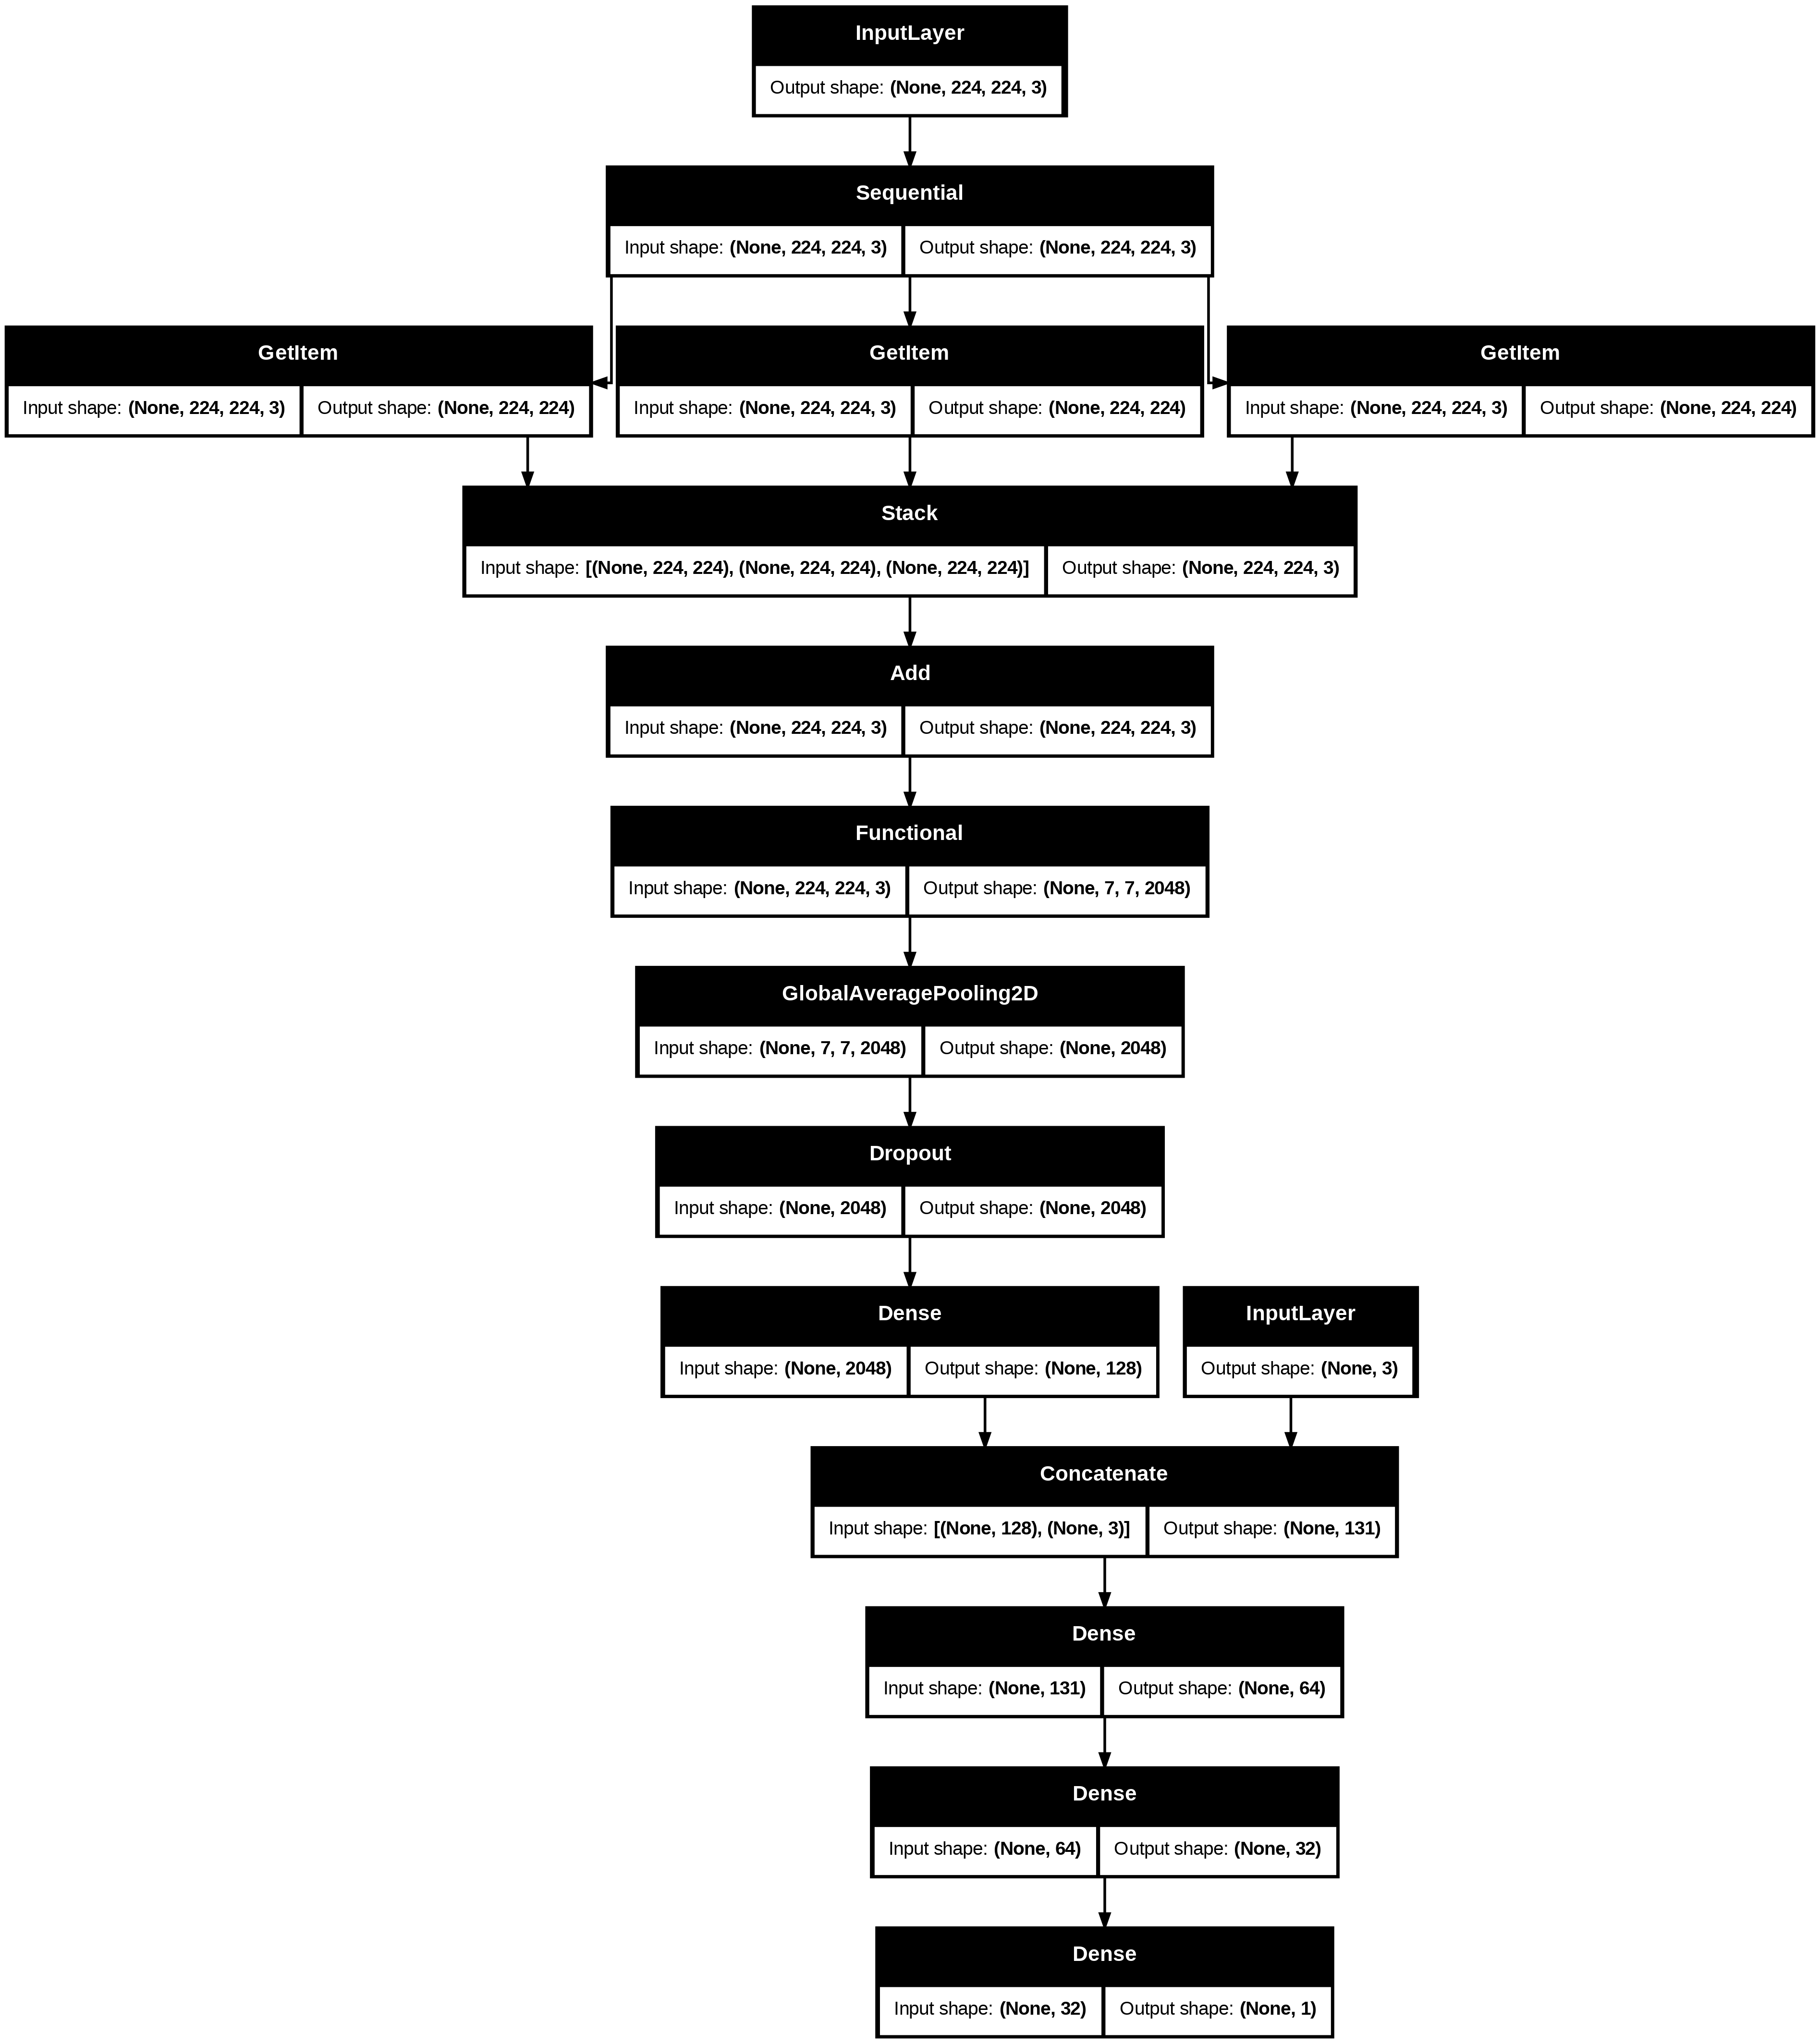

In [30]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Compile Model

In [31]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)

# Train Model

### Early stoppage

In [32]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', # Monitor the validation loss
    patience=10,        # Stop if it doesn't improve for 10 epochs
    restore_best_weights=True # Automatically restore the model weights from the best epoch
)

### Model Checkpoint

In [33]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/best_avocado_model.keras', # The path to save the model
    monitor='val_loss',               # Monitor the validation loss
    save_best_only=True               # Only save if the model is the best so far
)

### Callback Lists

In [34]:
callbacks_list = [
    early_stopping,
    model_checkpoint
]

In [35]:
history = model.fit(
    train_dataset, 
    epochs=40, 
    validation_data=test_dataset,
    callbacks=callbacks_list
)

Epoch 1/40


I0000 00:00:1756956973.056506      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


218/218 ━━━━━━━━━━━━━━━━━━━━ 74s 265ms/step - loss: 23.2235 - mae: 3.6815 - val_loss: 15.2941 - val_mae: 3.1452
Epoch 2/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 56s 255ms/step - loss: 12.0448 - mae: 2.6825 - val_loss: 12.9021 - val_mae: 2.9028
Epoch 3/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 57s 262ms/step - loss: 8.3035 - mae: 2.2225 - val_loss: 8.3491 - val_mae: 2.2480
Epoch 4/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 56s 257ms/step - loss: 7.5650 - mae: 2.0921 - val_loss: 9.2085 - val_mae: 2.3811
Epoch 5/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 56s 257ms/step - loss: 6.9647 - mae: 2.0045 - val_loss: 10.0634 - val_mae: 2.5099
Epoch 6/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 57s 261ms/step - loss: 6.3827 - mae: 1.9372 - val_loss: 7.6796 - val_mae: 2.1448
Epoch 7/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 56s 257ms/step - loss: 6.3620 - mae: 1.9280 - val_loss: 8.3130 - val_mae: 2.2737
Epoch 8/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 56s 257ms/step - loss: 6.1977 - mae: 1.9025 - val_loss: 8.5007 - val_mae: 2.2773
Epoch 9/40
218/218 ━━━━━━━━━━━━━━━━━━━

In [39]:
model.save('/kaggle/working/feature_extraction_model.keras')

# Overfitting?

In [40]:
import matplotlib.pyplot as plt

def plot_overfitting(history):
    # Plot loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    plt.show()

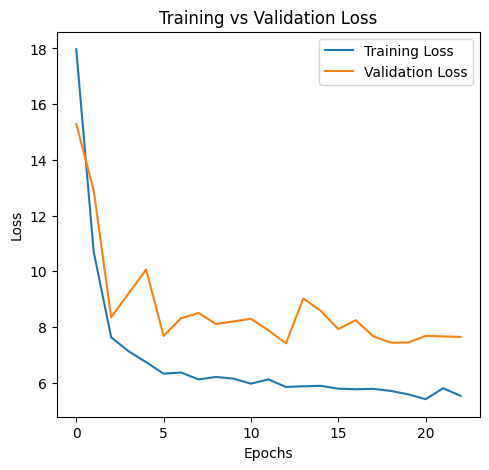

In [42]:
plot_overfitting(history)